# Finite DIfference Schemes

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = lambda x: np.sin(5*x)
df_exact = lambda x: 5*np.cos(5*x) #analytical derivative

def first_order(array, i, deltax):
    if(len(array)>(i+1)):
        return (array[i+1] - array[i])/(deltax)
    return(np.nan)

def second_order(array, i, deltax):
    if(len(array)>(i+1) and i>0):
        return (array[i+1] - array[i-1])/(2*deltax)
    return(np.nan)


def fourth_order(array, i, deltax):
    if(i>1 and len(array)>(i+2)):
        return (-1*array[i+2] + 8*array[i+1] - 8*array[i-1]+ array[i-2])/(12*deltax)
    return(np.nan)

In [3]:
fourth_order([2,4,5,6], 2, 1)

nan

In [11]:
L = 4 # domain
N=16
dx = float(L/(N-1))

Ns = np.array([8, 16, 32, 64, 128, 256, 512, 1024, 2048])  # number of grid cells, determines deltaX too 

In [12]:
def order_to_list(func, array, deltax=dx):
    result = np.array([])
    for i in range(len(array)):
        i=func(array, i, deltax)
        result = np.append(result, i)
    return(result)

In [13]:
a = np.linspace(0,L,16)
order_to_list(first_order, a, 1)

array([0.26666667, 0.26666667, 0.26666667, 0.26666667, 0.26666667,
       0.26666667, 0.26666667, 0.26666667, 0.26666667, 0.26666667,
       0.26666667, 0.26666667, 0.26666667, 0.26666667, 0.26666667,
              nan])

In [14]:
L = 4 # domain
Ns = np.array([8, 16, 32, 64, 128, 256, 512, 1024, 2048])  # number of grid cells, determines deltaX too 

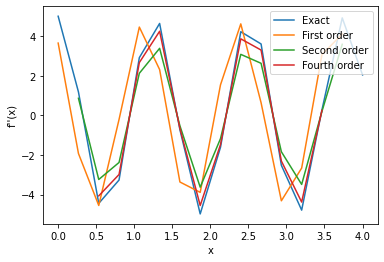

In [15]:
for N in Ns:
    x = np.linspace(0,L,N)
    dx = float(L/(N-1))
    
    y = f(x)
    
    first = order_to_list(first_order, y, dx)
    #print(first)
    second = order_to_list(second_order, y, dx)
    fourth = order_to_list(fourth_order, y, dx)
    
    #matplotlib
    
    
    if(N==16):
        plt.figure()
        plt.plot(x, df_exact(x), label='Exact')
        plt.plot(x, first, label='First order')
        plt.plot(x, second, label='Second order')
        plt.plot(x, fourth, label='Fourth order')
        plt.xlabel('x')
        plt.ylabel("f''(x)")
        plt.legend()
        
    

In [70]:
first

array([4.99992045, 4.99944316, 4.99848862, ..., 2.10707918, 2.06267726,
              nan])

## Part 2

In [103]:
def find_index(x_value, l=L, n=N):
    a = np.linspace(0,l,n)
    dx=(l/(n-1))
    return(int(x_value/dx))

def estimate_derivative(point, func, order_func, l=L, n=N):
    x_array = np.linspace(0,l,n)
    dx=(l/(n-1))
    i = int(point/dx)
    y = func(x_array)
    return(order_func(y, i, dx))
    

In [104]:
f = lambda x: np.sin(5*x)
df_exact = lambda x: 5*np.cos(5*x) #analytical derivative

In [ ]:
L=4
N=10000000000

e = estimate_derivative(1.5, f, first_order, L, N)
print(np.abs(df_exact(1.5)-e))

In [102]:
np.linspace(0,4,10000000)

1.7331765891751292

In [86]:
a = np.linspace(0,L,N)
y=f(a)

In [91]:
a[48]

1.5118110236220472

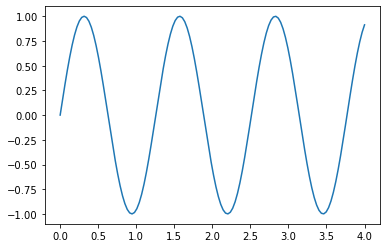

In [87]:
plt.plot(a,y)

In [155]:
## Define variables that do not change for different grids
L = 3 # length of domain
m = 0 # counter for number of grid sizes to plot


## Loop over different grid sizes (N = number of points in domain)
N = np.array([8, 16, 32, 64, 128, 256, 512, 1024, 2048]) 
dx = np.empty(9)
error_1st = np.empty(9)
error_2nd = np.empty(9)
error_4th = np.empty(9)

for i in np.nditer(N):    
    # Define resolution-dependent variables
    deltax = L/i                       # grid spacing
    x = np.linspace(0,L,i)          # define x and grid
    nx = len(x)                        # number of points in grid
    
    f = np.sin(5*x)                    # set f to function to be differentiated
    
    dfdx_exact = 5*np.cos(5*x)         # exact (analytical) derivative
    
    # Initialize arrays for 3 schemes with NaNs so that un-used values at the edge of the domain will not be plotted. 
    # This isn't necessary, but just makes the plotting a bit easier.
    dfdx_1st = np.nan*np.ones(len(dfdx_exact))
    dfdx_2nd = np.nan*np.ones(len(dfdx_exact))
    dfdx_4th = np.nan*np.ones(len(dfdx_exact))
    
    # Compute derivatives with three different approximations
    for j in range(3,nx-2): 
        dfdx_1st[j] =  (f[j+1]-f[j])/deltax                           # first order forward
        # TO DO: second order central
        # TO DO: fourth order central
    
       
    # TO DO: Plot the exact and approximated derivatives for the case where N=16

    
    # Extract the errors for x = 1.5, the midpoint of the domain
    dx[m] = deltax         # store the current deltax in an array for plotting later
    midpoint = int(i/2-1)  # calculate the midpoint index 
    print(midpoint)
    
    error_1st[m] = abs(dfdx_1st[midpoint]-dfdx_exact[midpoint])
    error_2nd[m] = abs(dfdx_2nd[midpoint]-dfdx_exact[midpoint])
    error_4th[m] = abs(dfdx_4th[midpoint]-dfdx_exact[midpoint])
    
    
    m = m+1  # advance counter for number of grids




## TO DO: Plot dx versus error at x = 1.5



3
7
15
31
63
127
255
511
1023


In [156]:
error_1st

array([3.32428423, 1.99686248, 1.03465698, 0.52139351, 0.26115429,
       0.13062578, 0.06531708, 0.03265861, 0.0163292 ])

# Solution

Now, time for some coding! Consider the first-order forward difference, second-order central difference, and fourth-order central difference approximations (you’ll need to look the last one up!) to the first derivative of f(x) = sin(5x).

(a) Plot the exact derivative and the three approx`imations on the same plot for 0 <= x <=4
and N = 16, where n equals the number of grid cells. Don’t worry about points near the
boundaries; you’ll leave those out for now.

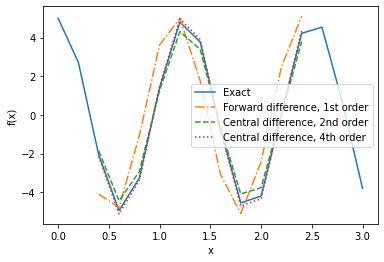

In [16]:
## Define variables that do not change for different grids
L = 3 # length of domain
m = 0 # counter for number of grid sizes to plot

## Loop over different grid sizes (N = number of points in domain)
N = np.array([8, 16, 32, 64, 128, 256, 512, 1024, 2048])
dx = np.empty(9)
error_1st = np.empty(9)
error_2nd = np.empty(9)
error_4th = np.empty(9)

for i in np.nditer(N):
    
    # Define resolution-dependent variables
    deltax = L/i # grid spacing
    x = np.linspace(0,L,i) # define x and grid
    nx = len(x) # number of points in grid
    
    f = np.sin(5*x) # function to be differentiated
    dfdx_exact = 5*np.cos(5*x) # exact (analytical) derivative
    # Initialize arrays for 3 schemes with NaNs so that un-used values at the edge of the domain will not be plotted.

    # This isn't necessary, but just makes the plotting a bit easier.
    dfdx_1st = np.nan*np.ones(len(dfdx_exact))
    dfdx_2nd = np.nan*np.ones(len(dfdx_exact))
    dfdx_4th = np.nan*np.ones(len(dfdx_exact))
    
    # Compute derivatives with three different approximations
    for j in range(2,nx-3):
        dfdx_1st[j] = (f[j+1]-f[j])/deltax # first,→order forward
        dfdx_2nd[j] = (f[j+1]-f[j-1])/(2*deltax) # second order central
        dfdx_4th[j] = (f[j-2]-8*f[j-1]+8*f[j+1]-f[j+2])/(12*deltax) # fourth␣order central

    # Plot the exact and approximated derivatives for the case where N=16
    if i == 16:
        plt.figure()
        plt.plot(x, dfdx_exact, label='Exact')
        plt.plot(x, dfdx_1st, '-.', label='Forward difference, 1st order')
        plt.plot(x, dfdx_2nd, '--', label='Central difference, 2nd order')
        plt.plot(x, dfdx_4th, ':', label='Central difference, 4th order')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        
    # Extract the errors for x = 1.5, the midpoint of the domain
    dx[m] = deltax # store the current deltax in an array for plotting later
    
    midpoint = int(i/2 - 1) # calculate the midpoint index
    error_1st[m] = abs(dfdx_1st[midpoint]-dfdx_exact[midpoint])
    error_2nd[m] = abs(dfdx_2nd[midpoint]-dfdx_exact[midpoint])
    error_4th[m] = abs(dfdx_4th[midpoint]-dfdx_exact[midpoint])

    m = m+1 # advance counter for number of grids

## Question 2

Evaluate the derivative at x = 1:5 and plot the absolute value of the differences from the

exact solution as a function of delta x on a log-log plot. Use N = 8, 16, 32, ..., 2048 and

discuss your plot.

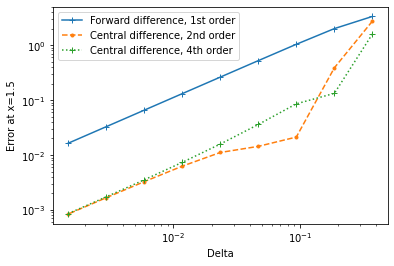

In [17]:
slope_1st = np.diff(np.log(error_1st))/np.diff(np.log(dx))
slope_2nd = np.diff(np.log(error_2nd))/np.diff(np.log(dx))
slope_4th = np.diff(np.log(error_4th))/np.diff(np.log(dx))

## Plot dx versus error at x = 1.5
plt.figure()
plt.loglog(dx,error_1st,'-+', label='Forward difference, 1st order')
plt.loglog(dx,error_2nd,'.--', label='Central difference, 2nd order')
plt.loglog(dx,error_4th,'+:', label='Central difference, 4th order')
plt.xlabel('Delta')
plt.ylabel('Error at x=1.5')
plt.legend()


In [18]:
slope_1st

array([0.73530876, 0.94858243, 0.98870801, 0.99747024, 0.99946279,
       0.99990739, 0.99999698, 1.00000922])

As the stencil becomes larger and we have a finer resolution, the error decreases at x = 1.5. The

error also decreases with higher order formulas, not only at x=1.5 but also at other points, because

higher order schemes give us more information and thus increased accuracy.

# Laplace's Equation, Thomas Algorithm

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
theta = 3

In [5]:
A = np.array([[1,0,0,0,0],[1,-2,1,0,0], [0,1,-2,1,0,], [0,0,1,-2,1,], [0,0,0,-1,1]])
y = [theta,0,0,0,0]

In [6]:
def Thomas(A,B,C,D):
    """A = np.copy(a)
    B = np.copy(b)
    C = np.copy(c)
    D = np.copy(d)"""
    
    
    n = len(B)-1 #last index of B
    
    for i in range(1,n+1):
        # because can't index from a2, a[i] is really a[i-1]
        B[i] -= C[i-1]*A[i-1]/B[i-1]
        D[i] -= D[i-1] * A[i-1] / B[i-1]
        
    #print(B)
    
    #BACKSUB
    result = [D[n]/B[n]]
    for i in range(n-1, -1, -1):
        xi = (D[i] - C[i] * result[0])/B[i]
        #print(xi)
        result.insert(0,xi)
    
    return(result)

In [7]:
Thomas([1,1,1,-1], [1, -2, -2, -2, 1], [0,1,1,1], [theta, 0,0,0,0])

[3.0,
 2.999999999999999,
 2.9999999999999987,
 2.9999999999999982,
 2.9999999999999982]

## Question 1

In [14]:
A = [1,1,1,0]
B = [1, -2, -2, -2, 1]
C = [0,1,1,1]
D = [2,0,0,0,3]

In [15]:
Thomas(A,B,C,D)

[2.0, 2.25, 2.4999999999999996, 2.7499999999999996, 3.0]

From 0 to 1 using N grid points

In [162]:
N = 21

In [163]:
A = np.append(np.ones(N-2), 0)
print(len(A))
A

20


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0.])

In [164]:
B = np.append(np.insert(-2*np.ones(N-2),0,1),1)
print(len(B))
B

21


array([ 1., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2.,  1.])

In [165]:
C = np.insert(np.ones(N-2), 0, 0)
print(len(C))
C

20


array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [166]:
D = np.append(np.insert(np.zeros(N-2),0,2),3)
print(len(D))
D

21


array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 3.])

In [16]:
y = Thomas(A,B,C,D)
y

[2.0, 13.499999999999995, 22.99999999999999, 19.99999999999999, 3.0]

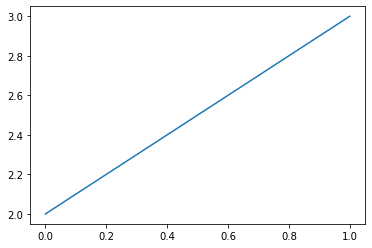

In [168]:
plt.plot(np.linspace(0,1,N), y)

In [87]:
np.linspace(0,1,N)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [141]:
len(np.copy([1,2,3]))

3

# Poisson Equation

#### Initialize constants

In [2]:
s1 = -1
s2 = 1
N = 41

In [4]:
r = 0.45
D = 0.1

r = 0.45 = D dt / dx2

In [52]:
dx = round((s2-s1)/(N-1), 2)
x = np.linspace(s1,s2,N)
x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ])

In [46]:
dt = round(r*(dx**2)/D, 5)
dt

0.01125

In [53]:
def find_index(x_value):
    return int((x_value-s1+0.00002)/dx)

In [72]:
Co = np.zeros(len(x)) # length is 41, max index thus 40
for i in range(find_index(-.3), find_index(.3)+1):
    Co[i] = 1.0
C = {0: Co} # at t=0, intitial coordinates

In [73]:
tm = 0 #t n-1
t = dt
tfinal = 1

ghost_L = C[0][1]
ghost_R = C[0][-2]

while (t<tfinal):
    # since derivative is 0, ghost points are flat
    
    Cn = []
    for i in range(N):
        if(i==0):
            Cn.append(r*(C[tm][i+1] + ghost_L) + (1-2*r)*C[tm][i])
        elif(i==N-1):
            Cn.append(r*(ghost_R + C[tm][i-1]) + (1-2*r)*C[tm][i])
        else:
            Cn.append(r*(C[tm][i+1] + C[tm][i-1]) + (1-2*r)*C[tm][i])
        
    C[t] = np.array(Cn)
    
    ghost_L = Cn[1]
    ghost_R = Cn[-2]
    tm = t
    t = round(t+dt,5)

In [74]:
C

{0: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 0.01125: array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.45, 0.55, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 0.55, 0.45, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]),
 0.0225: array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.2025, 0.2925, 0.7075, 0.7975,
        1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
        1.    , 0.7975, 0.7075, 0.2925, 0.2025, 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    ]),
 0.03375: array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.     

In [81]:
def time(t):
    return(round(dt*int(t/dt),5))

In [82]:
time(.96)

0.95625

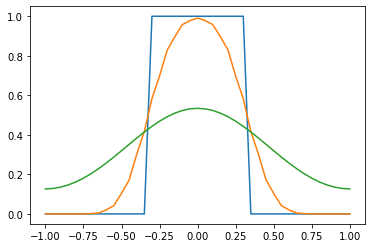

In [88]:
plt.figure()
plt.plot(x, C[0])
plt.plot(x, C[time(.1)])
plt.plot(x, C[time])

## Animation!

In [120]:
import matplotlib.animation as ani
import numpy as np
import matplotlib.pyplot as plt
import time

In [113]:
def animation(i=int):
    p = plt.plot(x, list(C.values())[i])

In [111]:
list(C.values())

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.45, 0.55, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.55, 0.45, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [92]:
fig = plt.figure()


<Figure size 432x288 with 0 Axes>

In [118]:
ani.FuncAnimation(fig, animation, 200)
plt.show()